Importing and Cleaning Contraceptive Data

In [100]:
import pandas as pd
import xml.etree.ElementTree as ET

In [101]:
#Read in excel data
contraceptive_df = pd.read_excel('cc_by_methods.xlsx')

In [102]:
# Create DataFrame from data
cc_df = pd.DataFrame(contraceptive_df)

In [103]:
cc_df.head()

,Country or area,ISO code,Survey\nstart year,Survey\nend year,Age group,Any method,Any modern method,Female\nsterilization,Male\nsterilization,IUD,...,Note on country,Note on data,Note on population,Contraceptive use: methods,Contraceptive use: residuals (modern methods),Contraceptive use: residuals (traditional methods),Unmet need: population included,Unmet need: population excluded,Unmet need: indicator,Unnamed: 39
0,Afghanistan,4,1972,1974,15-44,1.6,1.6,..,..,0.4,...,..,..,Data pertain to ever-married women of reproduc...,..,..,..,..,..,..,
1,Afghanistan,4,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,...,"Data pertain to Nangarhar, Konar and Laghman, ...",..,..,Figures by method do not add up to the total. ...,..,..,..,..,..,
2,Afghanistan,4,2003,2003,<50,10.3,8.7,..,..,..,...,..,Adjusted.,..,..,Including male and female sterilization.,..,..,..,..,
3,Afghanistan,4,2005,2005,<50,13.6,12.5,..,..,..,...,..,Adjusted.,..,..,Including male and female sterilization.,..,..,..,..,
4,Afghanistan,4,2006,2006,10-49,18.6,17.5,0.7,..,1,...,"Excluding the six largest cities (Kabul, Hirat...",..,..,Figures by method do not add up to the total.,..,..,..,..,..,


In [104]:
# Clean up data
cc_df = cc_df.iloc[1:]

# Renaming for readability
cc_df.rename(columns={'Survey\nstart year' : 'Survey Start Year'}, inplace=True)
cc_df.rename(columns={'Survey\nend year' : 'Survey End Year'}, inplace=True)
cc_df.rename(columns={'Any method' : 'Any method %'}, inplace=True)
cc_df.rename(columns={'Any modern method' : 'Any modern method %'}, inplace=True)
cc_df.rename(columns={'Female\nsterilization' : 'Female Sterilization %'}, inplace=True)
cc_df.rename(columns={'Male\nsterilization' : 'Male Sterilization %'}, inplace=True)
cc_df.rename(columns={'IUD' : 'IUD %'}, inplace=True)
cc_df.rename(columns={'Implant' : 'Implant %'}, inplace=True)
cc_df.rename(columns={'Injectable' : 'Injectable %'}, inplace=True)
cc_df.rename(columns={'Pill' : 'Pill %'}, inplace=True)
cc_df.rename(columns={'Male condom' : 'Male condom %'}, inplace=True)
cc_df.rename(columns={'Female condom' : 'Female condom %'}, inplace=True)
cc_df.rename(columns={'Vaginal barrier methods' : 'Vaginal barrier methods %'}, inplace=True)
cc_df.rename(columns={'Lactational amenorrhea method (LAM)' : 'Lactational amenorrhea method (LAM) %'}, inplace=True)
cc_df.rename(columns={'Emergency contraception' : 'Emergency contraception %'}, inplace=True)
cc_df.rename(columns={'Other modern methods' : 'Other modern methods %'}, inplace=True)
cc_df.rename(columns={'Any traditional method' : 'Any traditional method %'}, inplace=True)
cc_df.rename(columns={'Rhythm' : 'Rhythm %'}, inplace=True)
cc_df.rename(columns={'Withdrawal' : 'Withdrawal %'}, inplace=True)
cc_df.rename(columns={'Other traditional methods' : 'Other traditional methods %'}, inplace=True)
cc_df.rename(columns={'	Country or area' : 'Country'}, inplace=True)


In [105]:
cc_df.head()

,Country or area,ISO code,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,...,Note on country,Note on data,Note on population,Contraceptive use: methods,Contraceptive use: residuals (modern methods),Contraceptive use: residuals (traditional methods),Unmet need: population included,Unmet need: population excluded,Unmet need: indicator,Unnamed: 39
1,Afghanistan,4,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,...,"Data pertain to Nangarhar, Konar and Laghman, ...",..,..,Figures by method do not add up to the total. ...,..,..,..,..,..,
2,Afghanistan,4,2003,2003,<50,10.3,8.7,..,..,..,...,..,Adjusted.,..,..,Including male and female sterilization.,..,..,..,..,
3,Afghanistan,4,2005,2005,<50,13.6,12.5,..,..,..,...,..,Adjusted.,..,..,Including male and female sterilization.,..,..,..,..,
4,Afghanistan,4,2006,2006,10-49,18.6,17.5,0.7,..,1,...,"Excluding the six largest cities (Kabul, Hirat...",..,..,Figures by method do not add up to the total.,..,..,..,..,..,
5,Afghanistan,4,2007,2008,15-49,22.8,15.2,..,..,..,...,..,..,..,..,..,..,..,..,..,


In [106]:
#read the columns
for i in cc_df.columns:
    print (i)

Country or area
ISO code
Survey Start Year
Survey End Year
Age group
Any method %
Any modern method %
Female Sterilization %
Male Sterilization %
IUD %
Implant %
Injectable %
Pill %
Male condom %
Female condom %
Vaginal barrier methods %
Lactational amenorrhea method (LAM) %
Emergency contraception %
Other modern methods %
Any traditional method %
Rhythm %
Withdrawal %
Other traditional methods %
Unmet need total
Unmet need spacing
Unmet need limiting
Source
DataCatalog ID
DataCatalog LongName
DataCatalog ShortName
Note on country
Note on data
Note on population
Contraceptive use: methods
Contraceptive use: residuals  (modern methods)
Contraceptive use: residuals  (traditional methods)
Unmet need: population included
Unmet need: population excluded
Unmet need: indicator
Unnamed: 39


In [107]:
#cleaning the data and dropping extra columns
cc_clean_df = cc_df.drop(columns=["Unmet need total", "Unmet need spacing", "Unmet need limiting",
"DataCatalog ID",
"DataCatalog LongName",
"DataCatalog ShortName",
"Note on country",
"Note on data",
"Note on population",
"Contraceptive use: methods",
"Contraceptive use: residuals  (modern methods)",
"Contraceptive use: residuals  (traditional methods)",
"Unmet need: population included",
"Unmet need: population excluded",
"Unmet need: indicator",
"Unnamed: 39", "Source", "Rhythm %", "Withdrawal %", "Other traditional methods %", "Lactational amenorrhea method (LAM) %",
"Any traditional method %", "ISO code", "Other modern methods %", "Emergency contraception %", "Vaginal barrier methods %"
])

In [108]:
# Show Dataframe
cc_clean_df.head()

,Country or area,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %
1,Afghanistan,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,..,1.3,1.2,..,..
2,Afghanistan,2003,2003,<50,10.3,8.7,..,..,..,..,2.2,5,0.6,..
3,Afghanistan,2005,2005,<50,13.6,12.5,..,..,..,..,5,6,1.1,..
4,Afghanistan,2006,2006,10-49,18.6,17.5,0.7,..,1,..,5.4,8.1,2.2,..
5,Afghanistan,2007,2008,15-49,22.8,15.2,..,..,..,..,..,..,..,..


In [109]:
#checking remaining columns
for i in cc_clean_df.columns:
    print (i)

Country or area
Survey Start Year
Survey End Year
Age group
Any method %
Any modern method %
Female Sterilization %
Male Sterilization %
IUD %
Implant %
Injectable %
Pill %
Male condom %
Female condom %


In [110]:
# Write to csv
cc_clean_df.to_csv('data/contraceptive_clean.csv', index=False)

In [111]:
# Show dataframe
cc_clean_df.head()

,Country or area,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %
1,Afghanistan,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,..,1.3,1.2,..,..
2,Afghanistan,2003,2003,<50,10.3,8.7,..,..,..,..,2.2,5,0.6,..
3,Afghanistan,2005,2005,<50,13.6,12.5,..,..,..,..,5,6,1.1,..
4,Afghanistan,2006,2006,10-49,18.6,17.5,0.7,..,1,..,5.4,8.1,2.2,..
5,Afghanistan,2007,2008,15-49,22.8,15.2,..,..,..,..,..,..,..,..


Importing clean GDP (Development) data in order to add them to my data frame as an index to catagorize countries 

In [112]:
#Importing and Cleaning GDP (Development) Data

In [113]:
import xml.etree.ElementTree as ET
import pandas as pd
import csv

In [114]:
#reading the clean csv file
gdp_df=pd.read_csv('data/gdp_clean.csv')

In [115]:
#showing the data frame
gdp_df.head()

,Country,Year,Value,Development
0,Afghanistan,2012,1958.447627,Developing
1,Albania,2012,10526.250106,Developing
2,Algeria,2012,13347.362795,Developed
3,Angola,2012,7389.314960,Developing
4,Antigua and Barbuda,2012,20208.939288,Developed


In [116]:
#Renaming columns for merging
cc_clean_df=cc_clean_df.rename(columns={"Country or area": "Country"})

In [117]:
cc_clean_df.head()

,Country,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %
1,Afghanistan,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,..,1.3,1.2,..,..
2,Afghanistan,2003,2003,<50,10.3,8.7,..,..,..,..,2.2,5,0.6,..
3,Afghanistan,2005,2005,<50,13.6,12.5,..,..,..,..,5,6,1.1,..
4,Afghanistan,2006,2006,10-49,18.6,17.5,0.7,..,1,..,5.4,8.1,2.2,..
5,Afghanistan,2007,2008,15-49,22.8,15.2,..,..,..,..,..,..,..,..


In [118]:
#merging the clean contraceptive data frame and clean gdp data frame into one data frame
merged_df=pd.merge(cc_clean_df, gdp_df, on="Country")
merged_clean_df=merged_df.copy()

In [119]:
merged_clean_df.head()

,Country,Survey Start Year,Survey End Year,Age group,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Year,Value,Development
0,Afghanistan,2000,2000,12-49,5.3,3.6,0.8,0.1,0.3,..,1.3,1.2,..,..,2012,1958.447627,Developing
1,Afghanistan,2003,2003,<50,10.3,8.7,..,..,..,..,2.2,5,0.6,..,2012,1958.447627,Developing
2,Afghanistan,2005,2005,<50,13.6,12.5,..,..,..,..,5,6,1.1,..,2012,1958.447627,Developing
3,Afghanistan,2006,2006,10-49,18.6,17.5,0.7,..,1,..,5.4,8.1,2.2,..,2012,1958.447627,Developing
4,Afghanistan,2007,2008,15-49,22.8,15.2,..,..,..,..,..,..,..,..,2012,1958.447627,Developing


In [120]:
#Cleaning the data value columns (dropping all rows which have "..")
merged_clean_df = merged_clean_df.loc[merged_clean_df["Any method %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Any modern method %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Female Sterilization %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Male Sterilization %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["IUD %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Implant %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Injectable %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Pill %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Male condom %"]!="..",:]
merged_clean_df = merged_clean_df.loc[merged_clean_df["Female condom %"]!="..",:]

dropping "Year", "Value" and "Age group" columns, because I want to analysis the precentage of each contraceptive methode used in developing and developed countries.

In [121]:
#dropping "Year", "Value", "Age group" columns
merged_clean_df = merged_clean_df.drop(columns=["Year", "Value", "Age group"])

In [122]:
merged_clean_df.head()

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
5,Afghanistan,2010,2011,21.2,20.3,0.6,0.2,1.2,0.8,9.6,5.5,1.3,0.2,Developing
15,Albania,2017,2018,46,3.7,1,0,0.3,0,0.2,0.6,1.4,0,Developing
22,Algeria,2012,2013,57.1,49.5,0.5,0,2.2,0.2,0.1,43,1.9,0,Developed
23,Algeria,2018,2019,53.6,44.9,0.4,0.1,2.4,0.3,0,39,2.1,0,Developed
25,Angola,2001,2001,6.3,4.9,0.1,0,0.4,0,1.4,2.2,0.3,0.1,Developing


I have sorted the data frame based on the last "Survey End Year", in order to have the most updated values

In [123]:
#sorting the data frame based on the last "Survey End Year"
merged_clean_df = merged_clean_df.sort_values(by=["Country", "Survey End Year"], ascending=[True, False])
merged_clean_df = merged_clean_df.drop_duplicates(subset="Country", keep="first")

In [124]:
#cheking datas for not having repetitive countries
merged_clean_df["Country"].values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
       'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo',
       'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Fiji', 'Georgia',
       'Ghana', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Indonesia',
       'Iraq', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo',
       'Lebanon', 'Lesotho', 'Libya', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria',
       'North Macedonia', 'Panama', 'Papua New Guinea', 'Peru', 'Qatar',
       'Rwanda', 'Samoa', 'Saudi Arabia', 'Serbia', 'Sierra Leone',
       'Solomon Islands', 'South Africa', 'South Sudan', 'Sri L

In [125]:
merged_clean_df

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
5,Afghanistan,2010,2011,21.2,20.3,0.6,0.2,1.2,0.8,9.6,5.5,1.3,0.2,Developing
15,Albania,2017,2018,46,3.7,1,0,0.3,0,0.2,0.6,1.4,0,Developing
23,Algeria,2018,2019,53.6,44.9,0.4,0.1,2.4,0.3,0,39,2.1,0,Developed
25,Angola,2001,2001,6.3,4.9,0.1,0,0.4,0,1.4,2.2,0.3,0.1,Developing
38,Argentina,2019,2020,70.1,68.2,15.7,0.2,7.5,2.9,4.1,23.2,12.4,0.4,Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Uzbekistan,2021,2022,58.8,56.4,7.5,0,42.9,0,1.4,1.5,2.4,0,Developing
772,Vanuatu,2007,2007,38.4,37,5.8,0.3,2.5,0.2,10.6,15.7,1.1,0.2,Developing
1017,Viet Nam,2020,2021,72.8,59.8,1.6,0,23.7,0.3,2,16,15.3,0.7,Developing
1236,Zambia,1999,1999,22,18.5,0.4,0.2,0.5,0.2,2.5,12.6,1.2,0,Developing


Formulating the hypothesis:

Null Hypothesis (H0): There is no significant difference in the means of contraceptive methods' popularity or effectiveness between developing and developed countries.

Alternative Hypothesis (H1): There is a significant difference in the means of contraceptive methods' popularity or effectiveness between developing and developed countries.

Testing the overall significance differences between more than two methods by ANOVA (Analysis of Variance)

In [173]:
#importing libraries for calculating p-values
import pandas as pd
from scipy.stats import f_oneway

In [174]:
# Perform ANOVA test
f_val, p_val = f_oneway(merged_clean_df["Female Sterilization %"], merged_clean_df["Male Sterilization %"], merged_clean_df["IUD %"], 
                        merged_clean_df["Implant %"], merged_clean_df["Injectable %"], merged_clean_df["Pill %"], 
                        merged_clean_df["Male condom %"], merged_clean_df["Female condom %"])

In [175]:
# Print the ANOVA results
print("F-statistic:", f_val)
print("P-value:", p_val)

F-statistic: 22.05155597911754
P-value: 4.630506206795897e-27


The p-value from the ANOVA test is less than 0.05, we can assume that the mean of at least one method is significantly different from other methodes in Developing and Developed countries.

F-statistic of 22.05 suggests that there is a strong likelihood that at least one of the group means is significantly different from the others.

In order to find out which methods is the most effective (significantly different from the others) one in all countries, I calculate the mean of each methods and make a donut chart for better understanding.

In [176]:
#Recalling the main clean data frame for analysises 
merged_clean_df

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
5,Afghanistan,2010,2011,21.2,20.3,0.6,0.2,1.2,0.8,9.6,5.5,1.3,0.2,Developing
15,Albania,2017,2018,46.0,3.7,1.0,0.0,0.3,0.0,0.2,0.6,1.4,0.0,Developing
23,Algeria,2018,2019,53.6,44.9,0.4,0.1,2.4,0.3,0.0,39.0,2.1,0.0,Developed
25,Angola,2001,2001,6.3,4.9,0.1,0.0,0.4,0.0,1.4,2.2,0.3,0.1,Developing
38,Argentina,2019,2020,70.1,68.2,15.7,0.2,7.5,2.9,4.1,23.2,12.4,0.4,Developed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Uzbekistan,2021,2022,58.8,56.4,7.5,0.0,42.9,0.0,1.4,1.5,2.4,0.0,Developing
772,Vanuatu,2007,2007,38.4,37.0,5.8,0.3,2.5,0.2,10.6,15.7,1.1,0.2,Developing
1017,Viet Nam,2020,2021,72.8,59.8,1.6,0.0,23.7,0.3,2.0,16.0,15.3,0.7,Developing
1236,Zambia,1999,1999,22.0,18.5,0.4,0.2,0.5,0.2,2.5,12.6,1.2,0.0,Developing


In [177]:
#calculating the mean for each columns 
columns_means = merged_clean_df[["Female Sterilization %", "Male Sterilization %", "IUD %",
    "Implant %", "Injectable %",	"Pill %", "Male condom %", "Female condom %"]].mean(axis=0)

In [179]:

columns_means

Female Sterilization %    5.577778
Male Sterilization %      0.724444
IUD %                     5.342222
Implant %                 3.258889
Injectable %              8.011111
Pill %                    9.681111
Male condom %             5.365556
Female condom %           0.121111
dtype: float64

<Axes: title={'center': 'the mean precentage of each methods in both Developing and Developed countries'}>

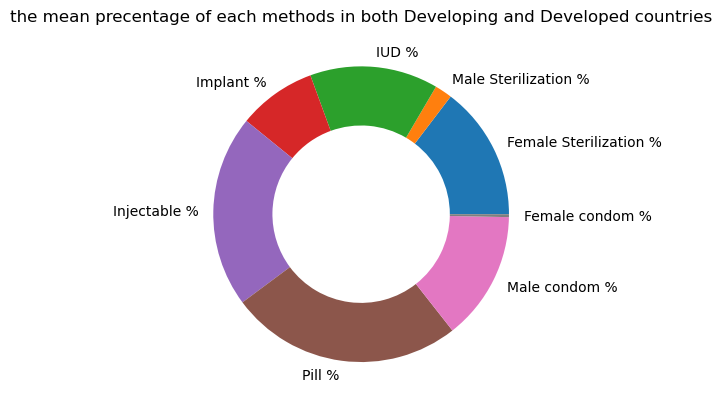

In [180]:
#ploting the mean of each columns in a donut chart
columns_means.plot(kind='pie', title= 'the mean precentage of each methods in both Developing and Developed countries', wedgeprops=dict(width=0.4))

.

Making two new data frames sorted by "developing" and "developed" countries based on "merged_clean_df", In order to find out which method is more popular in developing and developed countries.

In [181]:
#using the astype method for making the new data frames
merged_clean_df = merged_clean_df.astype({"Country":str,"Any method %":float,
                                          "Any modern method %":float,"Female Sterilization %":float,"Male Sterilization %":float,
                                          "IUD %":float,"Implant %":float,"Injectable %":float,"Pill %":float,"Male condom %":float,
                                          "Female condom %":float})

In [182]:
merged_clean_df.dtypes

Country                    object
Survey Start Year           int64
Survey End Year             int64
Any method %              float64
Any modern method %       float64
Female Sterilization %    float64
Male Sterilization %      float64
IUD %                     float64
Implant %                 float64
Injectable %              float64
Pill %                    float64
Male condom %             float64
Female condom %           float64
Development                object
dtype: object

In [183]:
#extract and make new df based on developing countries
developing_df = merged_clean_df[merged_clean_df["Development"]=="Developing"]

In [184]:
developing_df

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
5,Afghanistan,2010,2011,21.2,20.3,0.6,0.2,1.2,0.8,9.6,5.5,1.3,0.2,Developing
15,Albania,2017,2018,46.0,3.7,1.0,0.0,0.3,0.0,0.2,0.6,1.4,0.0,Developing
25,Angola,2001,2001,6.3,4.9,0.1,0.0,0.4,0.0,1.4,2.2,0.3,0.1,Developing
74,Bangladesh,2019,2019,62.7,59.1,3.3,0.5,0.7,1.6,12.5,34.3,6.0,0.0,Developing
117,Belize,2015,2016,51.4,48.5,17.4,0.1,1.5,3.3,10.1,10.9,4.8,0.3,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,Uzbekistan,2021,2022,58.8,56.4,7.5,0.0,42.9,0.0,1.4,1.5,2.4,0.0,Developing
772,Vanuatu,2007,2007,38.4,37.0,5.8,0.3,2.5,0.2,10.6,15.7,1.1,0.2,Developing
1017,Viet Nam,2020,2021,72.8,59.8,1.6,0.0,23.7,0.3,2.0,16.0,15.3,0.7,Developing
1236,Zambia,1999,1999,22.0,18.5,0.4,0.2,0.5,0.2,2.5,12.6,1.2,0.0,Developing


In order to be able to make a bar chart for comparing contraception methods in "developing" and "developed" countries , I made a list of methods cathegories, with average value of each method in "developing" and "developed" countries

In [185]:
#making the list of developing countries
developing_list= []
methods_cat=["Female Sterilization %", "Male Sterilization %", "IUD %",
            "Implant %", "Injectable %", "Pill %", "Male condom %", "Female condom %"]

for method in methods_cat:
    mean_developing=developing_df[method].mean()
    developing_list.append(mean_developing)

In [186]:
developing_list

[4.446875,
 0.3859375,
 5.176562500000001,
 4.171875,
 9.4453125,
 7.16875,
 3.6281250000000003,
 0.10156250000000003]

In [187]:
#extract and make new df based on developed
developed_df = merged_clean_df.loc[merged_clean_df["Development"]=="Developed", :]

In [133]:
developed_df

,Country,Survey Start Year,Survey End Year,Any method %,Any modern method %,Female Sterilization %,Male Sterilization %,IUD %,Implant %,Injectable %,Pill %,Male condom %,Female condom %,Development
23,Algeria,2018,2019,53.6,44.9,0.4,0.1,2.4,0.3,0.0,39.0,2.1,0.0,Developed
38,Argentina,2019,2020,70.1,68.2,15.7,0.2,7.5,2.9,4.1,23.2,12.4,0.4,Developed
41,Australia,2001,2002,70.8,70.8,15.9,13.7,0.8,0.8,1.1,23.8,15.2,0.1,Developed
83,Barbados,2012,2012,59.2,55.4,4.7,0.1,3.1,0.8,5.0,21.2,19.5,0.5,Developed
141,Belarus,2012,2012,63.1,52.0,3.2,0.0,15.1,0.1,0.1,10.3,22.3,0.1,Developed
105,Botswana,2000,2000,44.4,42.1,1.2,0.2,1.7,0.4,8.1,14.3,15.5,0.5,Developed
111,Brazil,2013,2013,80.2,77.7,21.4,4.2,2.0,0.1,5.3,34.2,10.3,0.1,Developed
247,Costa Rica,2018,2018,70.9,69.0,21.9,5.2,3.4,0.5,9.7,21.4,6.8,0.1,Developed
298,Equatorial Guinea,2000,2000,10.1,6.5,0.5,0.1,0.7,0.1,2.3,1.5,0.4,0.2,Developed
508,Iraq,2018,2018,52.8,36.1,3.0,0.1,8.8,0.2,3.9,16.0,3.2,0.1,Developed


In [188]:
#making the list of developed countries
developed_list= []
methods_cat=["Female Sterilization %", "Male Sterilization %", "IUD %",
            "Implant %", "Injectable %", "Pill %", "Male condom %", "Female condom %"]

for method in methods_cat:
    mean_developed=developed_df[method].mean()
    developed_list.append(mean_developed)

In [189]:
developed_list

[8.361538461538462,
 1.557692307692308,
 5.75,
 1.0115384615384615,
 4.480769230769231,
 15.865384615384613,
 9.642307692307693,
 0.16923076923076924]

Making bar chart for visualization and comparison between developing and developed countries

In [190]:
#importing libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

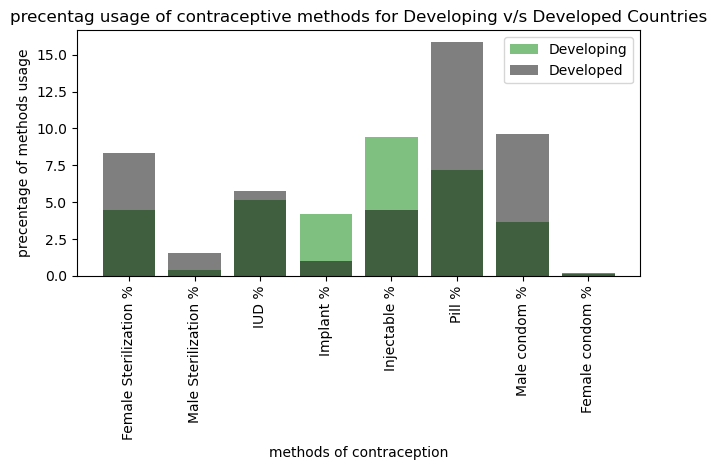

In [191]:
plt.bar(methods_cat, developing_list, label='Developing', color='green', alpha=0.5, align='center')
plt.bar(methods_cat, developed_list, label='Developed', color='black', alpha=0.5, align='center')
plt.xlabel('methods of contraception')
plt.ylabel('precentage of methods usage')
plt.title('precentag usage of contraceptive methods for Developing v/s Developed Countries')
plt.xticks(rotation= 90)

plt.legend()
plt.tight_layout()
plt.show()

calculating mean of each method in both developing and developed countries df

In [192]:
#Regrouping the data by methods to calculating the average of the developed countries
developed_df=developed_df[["Female Sterilization %", "Male Sterilization %", "IUD %",
                                          "Implant %", "Injectable %",	"Pill %", "Male condom %", "Female condom %", "Development"]]
developed_df=developed_df.groupby(["Development"]).mean().unstack()


In [193]:
developed_df

                        Development
Female Sterilization %  Developed       8.361538
Male Sterilization %    Developed       1.557692
IUD %                   Developed       5.750000
Implant %               Developed       1.011538
Injectable %            Developed       4.480769
Pill %                  Developed      15.865385
Male condom %           Developed       9.642308
Female condom %         Developed       0.169231
dtype: float64

In [194]:
#Regrouping the data by methods to calculating the average of the developing countries
developing_df=developing_df[["Female Sterilization %", "Male Sterilization %", "IUD %",
                                          "Implant %", "Injectable %",	"Pill %", "Male condom %", "Female condom %", "Development"]]
developing_df=developing_df.groupby(["Development"]).mean().unstack()

In [195]:
developing_df

                        Development
Female Sterilization %  Developing     4.446875
Male Sterilization %    Developing     0.385937
IUD %                   Developing     5.176563
Implant %               Developing     4.171875
Injectable %            Developing     9.445312
Pill %                  Developing     7.168750
Male condom %           Developing     3.628125
Female condom %         Developing     0.101562
dtype: float64

Concolusion:

hypothesis:

Null Hypothesis (H0): There is no significant difference in the means of contraceptive methods' popularity or effectiveness between developing and developed countries.

Alternative Hypothesis (H1): There is a significant difference in the means of contraceptive methods' popularity or effectiveness between developing and developed countries.

Regarding to the tests that have been done like ANOVA, and based on F-statistic: 22.05155597911754 and P-value: 4.630506206795897e-27 results we can conclude: 

*F-statistic of 22.05 suggests that there is a strong likelihood that at least one of the group means is significantly different from the others. 
*p-value of 4.630506206795897e-27 is much smaller than the standard significance levels of 0.05 or 0.01. This means that there is an extremely small probability (practically negligible) that the observed result occurred by chance under the assumption that the null hypothesis is true. In other words, we can confidently reject the null hypothesis and conclude that there is a statistically significant difference between the means of the groups being compared.

As we can see in the bar chart and also the numerical value of the means for each methods in developing and developed countries, we can conclude that the Pill with average usage of 15.86% is the most common contraceptive method in developed countries, on the other hand in the developing countries Injectable method with average usage of 9.44% is the most common one.
